<h><b> Air-BnB Price Prediction -  Linear Regression</b></h>

<b>Steps for Regression Modelling:</b>

1. <b>Business Problem Definition</b> - How to predict Room price Factor based on Location with defined factors
2. <b>Convert business problem</b> into statistical problem  sales = F(price attributes, product features, marketing info etc.)
3. <b>Finding the right technique</b> - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other Machine Learning techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. <b>Data colletion(Y, X)</b> - Identify the sources of information and collect the data
5. <b>Consolidate the data</b> - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. <b>Data preparation for modeling</b> (create data audit report to identify the steps to perform as part of data preparation)
    a. missinmg value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. <b>Basic assumptions</b> (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)

In [215]:
### Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import pandas_profiling
import sklearn as sk
import statsmodels as sm
import scipy.stats as stats

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings

In [216]:
##Import Data

data = pd.read_csv("H:/Machine Learning/7. Kaggle - Competition Data/Air-BnB Open Data - Liner Regression/AB_US_2020.csv")

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [217]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [218]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
id                                226030 non-null int64
name                              226002 non-null object
host_id                           226030 non-null int64
host_name                         225997 non-null object
neighbourhood_group               110185 non-null object
neighbourhood                     226030 non-null object
latitude                          226030 non-null float64
longitude                         226030 non-null float64
room_type                         226030 non-null object
price                             226030 non-null int64
minimum_nights                    226030 non-null int64
number_of_reviews                 226030 non-null int64
last_review                       177428 non-null object
reviews_per_month                 177428 non-null float64
calculated_host_listings_count    226030 non-null int64
availability_365                  226

In [220]:
data.shape

(226030, 17)

In [221]:
###Null Values - present in each variable

data.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

#### Data Analysis - Univaiate,BiVariate & Multivariate Analysis

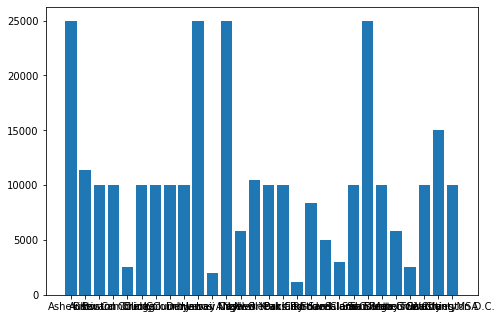

In [8]:

# 1. Price and Neighbourhood

fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
x_val = [x for x in data.city]
y_val = [x for x in data.price]

ax.bar(x_val,y_val)
plt.show()

In [9]:
### EDA - Using Pandas Profiling

profile_report = pandas_profiling.ProfileReport(data)
profile_report

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,17
Number of observations,226030
Total Missing (%),5.5%
Total size in memory,29.3 MiB
Average record size in memory,136.0 B
Numeric,10
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Conclusion as per Above Report

1. Drop columns : name , host_name ,neighbourhood_group
2. Analyse minimum_nights for skweness
3. Fill null values with repected Value
4. Modify Last_Review - Modify Null Value & ToDateTime

In [222]:
###Drop Columns

data = data.drop(columns=['name','host_name','neighbourhood_group'],axis=1)

In [223]:
data.head(2)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,165529,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,427027,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville


### Data Visualization - Analysis

In [224]:
### Analyse Skweness minimum nights and conclude for Outlier - We will consider values less than <=30 days

data.minimum_nights.value_counts()

1      60427
2      54748
30     33532
3      30931
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

In [225]:
# Modified existing data with minimum stays<30

data = data.loc[data.minimum_nights<=30]

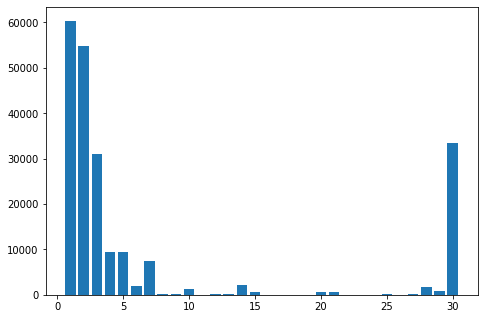

In [61]:
##Modifying the Data into Graphical Pattern

value = pd.DataFrame(data.minimum_nights.value_counts())

fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
x_val = [x for x in value.index]
y_val = [x for x in value.minimum_nights]

ax.bar(x_val,y_val)
plt.show()

In [226]:
### Analyse Room Type and encoding to Nimerical Values

data.room_type.value_counts()

Entire home/apt    147548
Private room        63710
Shared room          3854
Hotel room           1923
Name: room_type, dtype: int64

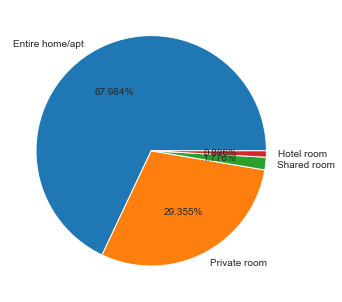

In [227]:
##Share Ditribution

fig = plt.figure()
ax =  fig.add_axes([0,0,1,1])
x_label = ['Entire home/apt','Private room','Shared room','Hotel room']
y_label = data.room_type.value_counts()
plt.pie(y_label,labels=x_label,autopct='%1.3f%%')
plt.show()

In [228]:
##Modifuing Data with Entire home = 1,Private Room = 2, Hotel Room = 3

ts = data.room_type
data.room_type = np.where(ts=='Entire home/apt',1,
                          np.where(ts=='Private room',2,
                                  np.where(ts=='Hotel room',3,
                                          np.where(ts=='Shared room',4,0))))

In [229]:
data.room_type.value_counts()

1    147548
2     63710
4      3854
3      1923
Name: room_type, dtype: int64

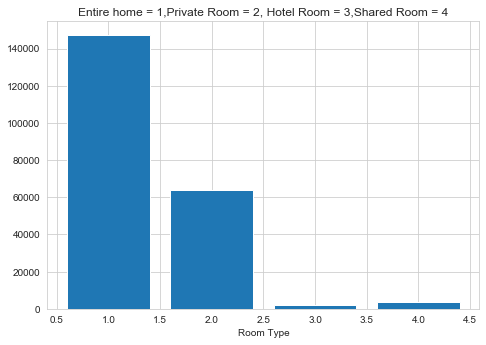

In [169]:
##Modifying the Data into Graphical Pattern - Room Type

value = pd.DataFrame(data.room_type.value_counts())

fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
x_val = [x for x in value.index]
y_val = [x for x in value.room_type]

ax.bar(x_val,y_val)
plt.xlabel('Room Type')
plt.title('Entire home = 1,Private Room = 2, Hotel Room = 3,Shared Room = 4')
plt.show()

In [230]:
##Analyse City Variable

data.city.value_counts()

New York City        44845
Los Angeles          28877
Hawaii               22224
San Diego            12169
Broward County       10622
Austin               10102
Clark County          7867
Washington D.C.       7112
San Francisco         6773
San Clara Country     6720
Seattle               6486
Twin Cities MSA       6429
New Orleans           6338
Nashville             6025
Chicago               5943
Portland              4172
Denver                4070
Rhode Island          3838
Oakland               3101
San Mateo County      2781
Jersey City           2415
Boston                2135
Asheville             2058
Santa Cruz County     1556
Columbus              1390
Cambridge              615
Salem                  200
Pacific Grove          172
Name: city, dtype: int64

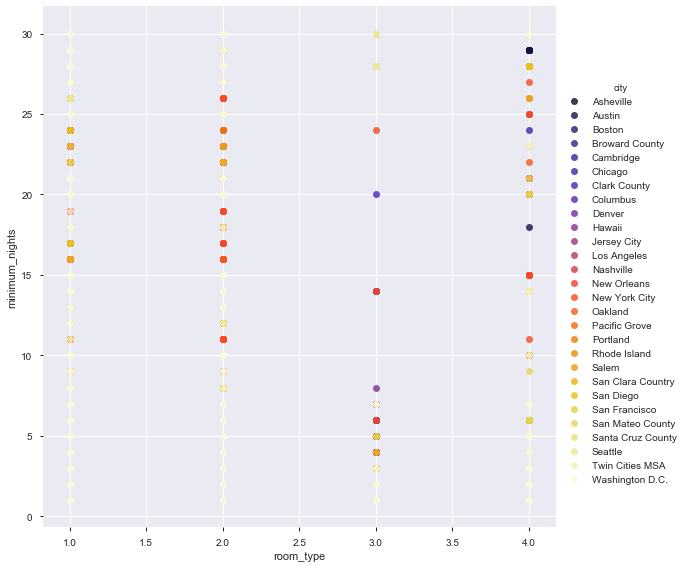

In [88]:
##Analsye RoomType ,Minimum Stays and City

## Room Type: Entire home = 1,Private Room = 2, Hotel Room = 3 , 4 = SHared Room

sns.lmplot(x='room_type',y='minimum_nights',data=data,hue='city',fit_reg=False,palette='CMRmap',size=8)

In [231]:
ts = data.groupby(by=['city','room_type'])
res2 = ts[['minimum_nights']].count()
res2.reset_index()

,city,room_type,minimum_nights
0,Asheville,1,1670
1,Asheville,2,362
2,Asheville,3,19
3,Asheville,4,7
4,Austin,1,7798
...,...,...,...
103,Twin Cities MSA,4,48
104,Washington D.C.,1,5066
105,Washington D.C.,2,1838
106,Washington D.C.,3,41


In [232]:
##Analyse Host Listing Count

data.calculated_host_listings_count.value_counts()

1     101108
2      28869
3      14593
4       9328
5       5793
       ...  
79        79
72        72
68        68
70        64
54        62
Name: calculated_host_listings_count, Length: 141, dtype: int64

In [233]:
ts = data.groupby(by=['host_id'])
res1 = ts[['calculated_host_listings_count','room_type','city']].count()
res1.reset_index()

,host_id,calculated_host_listings_count,room_type,city
0,23,3,3,3
1,521,1,1,1
2,615,2,2,2
3,666,2,2,2
4,743,2,2,2
...,...,...,...,...
126415,367415444,9,9,9
126416,367565136,2,2,2
126417,367730375,1,1,1
126418,367907062,4,4,4


### Data Preparation

In [234]:
data.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,165529,28804,35.65146,-82.62792,2,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,427027,28801,35.59779,-82.55540,1,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,320564,28801,35.60670,-82.55563,1,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,746673,28806,35.57864,-82.59578,1,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,769252,28801,35.61442,-82.54127,2,125,30,58,19/10/15,0.52,1,0,Asheville


In [235]:
### Feature Columns

numerical_feature = [x for x in data if data.dtypes[x] in ['int64','int32','float64']]
categorical_feature = [x for x in data if data.dtypes[x] in ['object']]

In [236]:
numerical_var = data[numerical_feature]
categorical_var = data[categorical_feature]

In [237]:
#### Prepare Audit Report for Numerical Value


def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [238]:
numerical_var.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
id,217035.0,0.0,5.524664e+12,2.545517e+07,2.584243e+07,1.313803e+07,1.726078e+14,109.00000,349540.720000,2.615682e+06,6.145139e+06,1.520629e+07,2.584243e+07,3.766078e+07,4.245037e+07,4.371292e+07,4.515251e+07,4.556085e+07
host_id,217035.0,0.0,2.034444e+13,9.373807e+07,5.185162e+07,9.802852e+07,9.609591e+15,23.00000,137276.160000,1.362002e+06,3.383961e+06,1.417125e+07,5.185162e+07,1.504576e+08,2.584177e+08,3.035364e+08,3.524448e+08,3.679176e+08
latitude,217035.0,0.0,7.727845e+06,3.560645e+01,3.725760e+01,6.910223e+00,4.775118e+01,18.92099,19.615980,2.094722e+01,2.222298e+01,3.274934e+01,3.725760e+01,4.072283e+01,4.193813e+01,4.528147e+01,4.764853e+01,4.773462e+01
longitude,217035.0,0.0,-2.242765e+07,-1.033366e+02,-9.779001e+01,2.634731e+01,6.941809e+02,-159.71490,-159.446717,-1.566896e+02,-1.550018e+02,-1.188230e+02,-9.779001e+01,-7.697604e+01,-7.394314e+01,-7.390000e+01,-7.111239e+01,-7.099595e+01
room_type,217035.0,0.0,2.961530e+05,1.364540e+00,1.000000e+00,5.965886e-01,3.559180e-01,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
price,217035.0,0.0,4.790788e+07,2.207380e+02,1.230000e+02,5.731233e+02,3.284703e+05,0.00000,26.000000,4.000000e+01,5.000000e+01,7.500000e+01,1.230000e+02,2.050000e+02,3.850000e+02,6.000000e+02,1.695000e+03,2.499900e+04
minimum_nights,217035.0,0.0,1.585744e+06,7.306398e+00,2.000000e+00,1.041730e+01,1.085202e+02,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
number_of_reviews,217035.0,0.0,7.639476e+06,3.519928e+01,8.000000e+00,6.422898e+01,4.125362e+03,0.00000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00,4.000000e+01,1.050000e+02,1.630000e+02,3.090000e+02,9.660000e+02
reviews_per_month,171780.0,45255.0,2.496971e+05,1.453587e+00,8.300000e-01,1.695387e+00,2.874336e+00,0.01000,0.020000,5.000000e-02,9.000000e-02,2.400000e-01,8.300000e-01,2.100000e+00,3.710000e+00,4.870000e+00,7.500000e+00,4.406000e+01
calculated_host_listings_count,217035.0,0.0,3.509097e+06,1.616835e+01,2.000000e+00,4.914764e+01,2.415490e+03,1.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,3.600000e+01,8.800000e+01,2.330000e+02,5.930000e+02


In [239]:
### Handling Missing Value

def Missing_value_Imputation_Num(x):
    x = x.fillna(x.median())
    return x

numerical_var = numerical_var.apply(lambda x:Missing_value_Imputation_Num(x))

In [240]:
## Validate any Numerical Value in list

numerical_var.isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Outlier Treatment

In [241]:
def Outlier_Capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.25))
    return x

#Implementing Outlier Function
numerical_var = numerical_var.apply(Outlier_Capping)

In [242]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [243]:
categorical_var.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
neighbourhood,217035,0,Unincorporated Areas,7682,3.54
last_review,171780,45255,15/03/20,2871,1.67
city,217035,0,New York City,44845,20.66


In [244]:
##Dropping Columns

numerical_var = numerical_var.drop(columns=['latitude','longitude','id'])
categorical_var = categorical_var.drop(columns=['last_review'])

In [245]:
##Categorical Values Analysis

categorical_var.neighbourhood.value_counts()

Unincorporated Areas    7682
Hollywood               4118
Primary Urban Center    4117
Hennepin                3910
Kihei-Makena            3880
                        ... 
Coliseum Industrial        1
Fischer Dev                1
Elmhurst Park              1
Sepulveda Basin            1
Leather District           1
Name: neighbourhood, Length: 1450, dtype: int64

In [246]:
ts = categorical_var.groupby(by=['city'])
ts[['neighbourhood']].count().reset_index()

,city,neighbourhood
0,Asheville,2058
1,Austin,10102
2,Boston,2135
3,Broward County,10622
4,Cambridge,615
5,Chicago,5943
6,Clark County,7867
7,Columbus,1390
8,Denver,4070
9,Hawaii,22224


In [247]:
###Handling Categorical Values - Dummies

# get the useful categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [248]:
# for c_feature in categorical_features
for c_feature in ['neighbourhood','city']:
    categorical_var[c_feature] = categorical_var[c_feature].astype('object')
    categorical_var = create_dummies(categorical_var, c_feature)

In [249]:
categorical_var.head(5)

,neighbourhood_28715,neighbourhood_28732,neighbourhood_28801,neighbourhood_28803,neighbourhood_28804,neighbourhood_28805,neighbourhood_28806,neighbourhood_78701,neighbourhood_78702,neighbourhood_78703,...,city_Rhode Island,city_Salem,city_San Clara Country,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Final_Data - After Data Preparation

In [250]:
Data_Final = pd.concat([numerical_var,categorical_var],axis=1)
Data_Final.head(4)

,host_id,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_28715,neighbourhood_28732,...,city_Rhode Island,city_Salem,city_San Clara Country,city_San Diego,city_San Francisco,city_San Mateo County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.
0,14171249.5,2,75,1,138,1.14,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14171249.5,1,470,1,114,1.03,11,288,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14171249.5,1,75,30,89,0.81,2,298,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14171249.5,1,90,1,267,2.39,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
Data_Final.price = Data_Final.price.astype('int64')

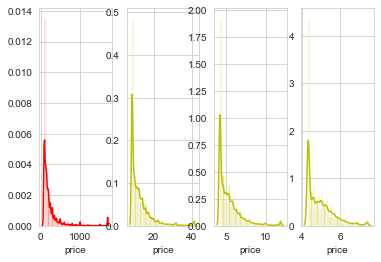

In [252]:
###Linear Regression - Normality Checking

sns.set_style('whitegrid')

plt.subplot(1,4,1)
sns.distplot(Data_Final.price,color='r')

plt.subplot(1,4,2)
sns.distplot(np.sqrt(Data_Final.price),color='y')

plt.subplot(1,4,3)
sns.distplot(np.cbrt(Data_Final.price),color='y')

plt.subplot(1,4,4)
sns.distplot(np.log(Data_Final.price),color='y')

#As we can verify the Distribution is more symetric in Log derivation of Sales Price

In [253]:
Data_Final['log_price'] = np.log(Data_Final.price)

In [254]:
Data_Final.price.skew()

##Obs: skewness > 0 : more weight in the left tail of the distribution

3.956270190452693

In [255]:
Data_Final.log_price.skew()

1.2675341366952035

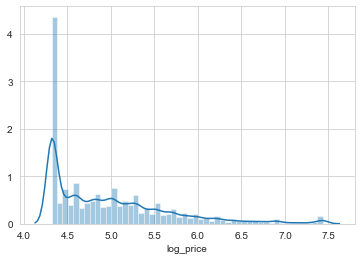

In [256]:
sns.distplot(Data_Final.log_price)

In [257]:
print('The Mean is {} ,Median is {} and std is {}'.format(Data_Final.log_price.mean(),Data_Final.log_price.median(),np.std(Data_Final.log_price)))

The Mean is 4.980052422930685 ,Median is 4.812184355372417 and std is 0.6998670759917768


#### Observation - Using the CubeRoot our Price value shown Normality to Reduce Skewness

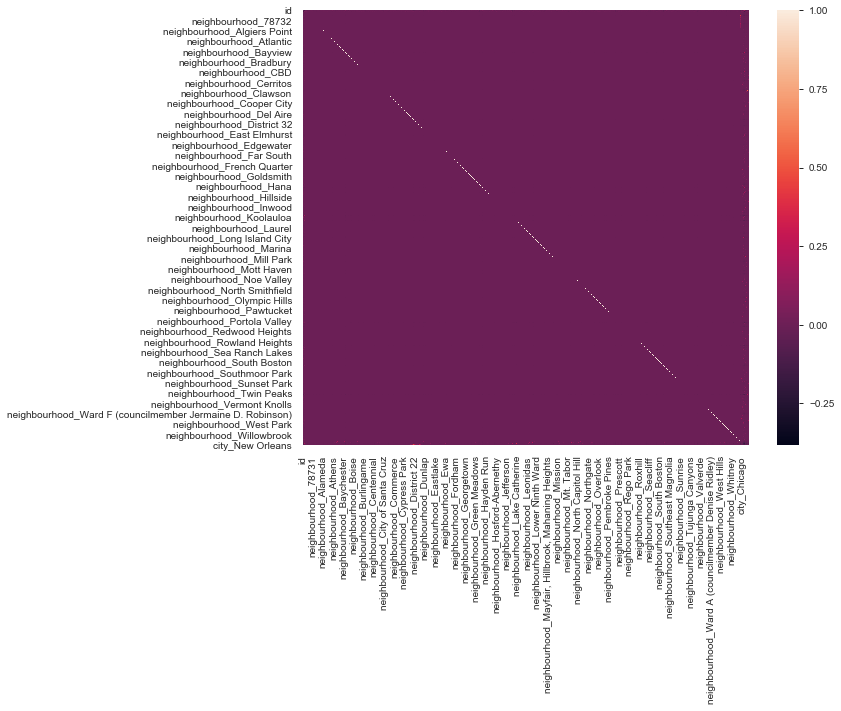

In [257]:
###Correlation of XVar with respect to Y

plt.figure(figsize=(10,8))
sns.heatmap(Data_Final.corr())

#### Data Prepartion Step-3
#### Feature Engineering - Feature selection - Variable reduction


In [262]:
#### 1. Correlation Matrix - Reject X-Values having CV<0.05 Values [Spearman Correlation]

Corr_Mat = Data_Final.corr()
Corr_Mat.to_csv('Air_Bnb_Price.csv')

In [258]:
#### Modifying Values List based on Correlation Matrix

values_List = ['log_price','price','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365',
              'neighbourhood_Bedford-Stuyvesant','neighbourhood_Beverly Crest','neighbourhood_Bushwick','neighbourhood_Carver',
              'neighbourhood_Hennepin','neighbourhood_Hollywood Hills West','neighbourhood_Kihei-Makena','neighbourhood_Koloa-Poipu',
              'neighbourhood_La Jolla','neighbourhood_Lahaina','neighbourhood_Malibu','neighbourhood_Mission Bay','neighbourhood_Newport',
              'neighbourhood_North Shore Kauai','neighbourhood_South Kohala','city_Hawaii','city_New York City','city_Rhode Island','city_Twin Cities MSA']


In [259]:
Data_Final =  Data_Final[values_List]

In [260]:
#Calculating CV for all the variables and deleting Variable having cv_vars<0.05

cv_vars = Data_Final.apply(lambda x: np.mean(x)/np.std(x) )
data = pd.DataFrame(cv_vars)

In [261]:
cv_variable = data.sort_values(by=[0],ascending=False)
cv_variable = cv_variable.rename(columns={0:'Variable'})

In [262]:
##Selecting the List of variables having CV value >0.1

cv_variable>0.1

,Variable
log_price,True
room_type,True
availability_365,True
reviews_per_month,True
price,True
minimum_nights,True
number_of_reviews,True
city_New York City,True
calculated_host_listings_count,True
city_Hawaii,True


In [263]:
final_values_list = ['log_price','price','room_type','availability_365','reviews_per_month','minimum_nights','number_of_reviews','city_New York City',
                    'city_Hawaii','calculated_host_listings_count','city_Twin Cities MSA','neighbourhood_Hennepin','neighbourhood_Kihei-Makena',
                    'city_Rhode Island','neighbourhood_Lahaina','neighbourhood_Bedford-Stuyvesant']

In [264]:
Data_Final = Data_Final[final_values_list]

#### Splitting the Data into Train and Test  - Feature Reduction

In [266]:
feature_columns = Data_Final.columns.difference(['price','log_price'])

In [267]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#### Using ML Model - Linear Regression Model for Feature Selection

In [268]:
# Creating Train and Test Dataset

X = Data_Final[feature_columns]
Y = Data_Final['log_price']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [269]:
# Initializing Model - Linear Regression to come up with Coefficients

linreg_model = linear_model.LinearRegression()

In [270]:
# Fitting Model

ln_model=linreg_model.fit(X_train,Y_train)

y_pred=ln_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

#metrics.mean_absolute_error(Y_train,y_pred)
metrics.mean_absolute_error(Y_test,y_pred)

0.46955523316727993

In [271]:
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])
Non_Reg_coef

,Non_Reg_Coefficient
availability_365,0.000493
calculated_host_listings_count,0.000747
city_Hawaii,0.065744
city_New York City,-0.122915
city_Rhode Island,0.308194
city_Twin Cities MSA,0.402428
minimum_nights,-0.008023
neighbourhood_Bedford-Stuyvesant,-0.133422
neighbourhood_Hennepin,-0.028145
neighbourhood_Kihei-Makena,0.048057


In [272]:
# Initializing Model

tuned_parameters = [{'alpha': [0.001,0.01,0.1,1.,10.,100.]}]

RidgeCV = GridSearchCV(linear_model.Ridge(),
                   tuned_parameters,
                   cv=5,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

RidgeCV.fit(X_train,Y_train)

print('Best combination:', RidgeCV.best_params_);

Best combination: {'alpha': 10.0}


In [273]:
# Fitting Model

Ridge=linear_model.Ridge(alpha=10.0)

Ridge_model=Ridge.fit(X_train,Y_train)

y_pred=Ridge_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

0.46956227504360437

In [274]:
# Finding the Coefficients

Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])
Ridge_coef

,Ridge_Coefficient
availability_365,0.000493
calculated_host_listings_count,0.000748
city_Hawaii,0.066060
city_New York City,-0.123003
city_Rhode Island,0.306976
city_Twin Cities MSA,0.399948
minimum_nights,-0.008026
neighbourhood_Bedford-Stuyvesant,-0.132842
neighbourhood_Hennepin,-0.025650
neighbourhood_Kihei-Makena,0.047457


In [275]:
# Initializing Model

tuned_parameters = [{'alpha': [0.0,0.0001,0.001,0.01,0.1,1.,10.,100.]}]

LassoCV = GridSearchCV(linear_model.Lasso(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

LassoCV.fit(X_train,Y_train)

print('Best combination:', LassoCV.best_params_);

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Best combination: {'alpha': 0.0}


C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28638.613015515257, tolerance: 7.420267242036585
  positive)


In [276]:
# Fitting Model
Lasso = linear_model.Lasso(alpha=0.0001)
Lasso.fit(X_train,Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [278]:
# Finding the Coefficients

lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])
lasso_coef

,Lasso_Coefficient
availability_365,0.000493
calculated_host_listings_count,0.000754
city_Hawaii,0.066726
city_New York City,-0.123219
city_Rhode Island,0.302206
city_Twin Cities MSA,0.384962
minimum_nights,-0.008040
neighbourhood_Bedford-Stuyvesant,-0.126808
neighbourhood_Hennepin,-0.005425
neighbourhood_Kihei-Makena,0.040624


In [279]:
# Initializing Model

tuned_parameters = [{'alpha': [0.0001,0.001,0.01,0.1,1.,10.,100.]}]

ElasticNet_CV = GridSearchCV(linear_model.ElasticNet(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

ElasticNet_CV.fit(X_train,Y_train)

print('Best combination:', ElasticNet_CV.best_params_);

Best combination: {'alpha': 0.0001}


In [280]:
# Fitting Model
EN = linear_model.ElasticNet(alpha=0.0001)
EN_model=EN.fit(X_train,Y_train)


y_pred=EN_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

#X_train,X_test,Y_train,Y_test
#metrics.mean_squared_error(train.actual_sales , train.pred_sales)

0.4695802771295124

In [281]:
# Finding the Coefficients

elastic_coef = pd.DataFrame(EN.coef_,X_train.columns,columns=['Elastic_Net_Coefficient'])
elastic_coef

,Elastic_Net_Coefficient
availability_365,0.000493
calculated_host_listings_count,0.000751
city_Hawaii,0.066471
city_New York City,-0.123132
city_Rhode Island,0.304284
city_Twin Cities MSA,0.391892
minimum_nights,-0.008034
neighbourhood_Bedford-Stuyvesant,-0.129686
neighbourhood_Hennepin,-0.014999
neighbourhood_Kihei-Makena,0.043900


In [282]:
pd.concat([Non_Reg_coef,Ridge_coef,lasso_coef,elastic_coef],axis=1)

,Non_Reg_Coefficient,Ridge_Coefficient,Lasso_Coefficient,Elastic_Net_Coefficient
availability_365,0.000493,0.000493,0.000493,0.000493
calculated_host_listings_count,0.000747,0.000748,0.000754,0.000751
city_Hawaii,0.065744,0.066060,0.066726,0.066471
city_New York City,-0.122915,-0.123003,-0.123219,-0.123132
city_Rhode Island,0.308194,0.306976,0.302206,0.304284
city_Twin Cities MSA,0.402428,0.399948,0.384962,0.391892
minimum_nights,-0.008023,-0.008026,-0.008040,-0.008034
neighbourhood_Bedford-Stuyvesant,-0.133422,-0.132842,-0.126808,-0.129686
neighbourhood_Hennepin,-0.028145,-0.025650,-0.005425,-0.014999
neighbourhood_Kihei-Makena,0.048057,0.047457,0.040624,0.043900


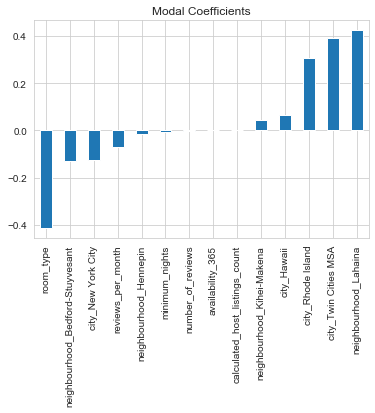

In [283]:
#checking the magnitude of coefficients - Elastic Net

predictors = X_train.columns

coef = pd.Series(EN.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [284]:
final_feature_columns = Data_Final[list(Data_Final.columns)]

In [285]:
# method 2: divide the data into training and testing
train_x, test_x, train_y, test_y = train_test_split(final_feature_columns, 
                                            Data_Final.log_price, test_size = 0.3, random_state = 12345)

In [286]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train_reg), ' | ', 'No of obs in testing: ', len(test_reg))

No of obs in training:  108517  |  No of obs in testing:  108518


In [287]:
#Import Packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor,export_graphviz,export
from sklearn.model_selection import GridSearchCV

#### 1. Decision Tree Regression

In [288]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [289]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_x, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [290]:
tree.best_score_

0.8621912072255306

In [291]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [292]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [293]:
tree_train_pred= tree.predict(train_x)
tree_test_pred= tree.predict(test_x)

In [294]:
#Accuracy Metrics for the Train and Test Data

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.0196627990338268
0.019665751643783883

RMSE values for training and testing data :
0.11844350899760897
0.1183390848021519


#### 2. Bagging Regression

In [295]:
#Importing required Packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [298]:
## Model Building

param_ada = {'n_estimators':[50,60,70,80,90,100]}

gscv_Bagging = GridSearchCV(estimator=BaggingRegressor(),param_grid = param_ada , cv = 5, n_jobs= -1)

data_Bagging = gscv_Bagging.fit(train_x,train_y)

In [299]:
data_Bagging

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [302]:
#Predicting values for both training and testing data sets

bagg_train_pred = data_Bagging.predict(train_x)
bagg_test_pred =  data_Bagging.predict(test_x)

In [303]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - bagg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- bagg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
4.20322519457731e-07
6.781102309348586e-07

RMSE values for training and testing data :
3.483568861152979e-05
5.707980772170268e-05


#### 3. Random Forest Regression

In [304]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
         

In [306]:
#Predicting values for both training and testing data sets

rf_train_pred = data_rf.predict(train_x)
rf_test_pred =  data_rf.predict(test_x)

In [307]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.005493988480447908
0.005515977778089402

RMSE values for training and testing data :
0.043287563537024294
0.04345316903238988


#### 4. Adaptive Boosting

In [308]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.8min finished


In [309]:
#Predicting values for both training and testing data sets

boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [310]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - boost_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- boost_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.008958271721809831
0.008940451111853999

RMSE values for training and testing data :
0.051581495618102616
0.051412055106757365


#### 5 . Gradient Boosting

In [311]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_gradBoost = GridSearchCV(estimator= GradientBoostingRegressor(), 
                              param_grid= param_grid, 
                              cv = 5,
                              verbose= True,
                              n_jobs= -1)
data_gbm = gscv_gradBoost.fit(train_x , train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   52.1s finished


In [312]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [313]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.003761759536013236
0.003821254352915436

RMSE values for training and testing data :
0.027399388564680403
0.027850695576514085


#### 6. Gradient Boosting

In [314]:
import xgboost

pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

In [315]:
#Predicting values for both training and testing data sets
xg_train_pred = data_xg.predict(train_x)
xg_test_pred = data_xg.predict(test_x)

In [316]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
6.826678819134317e-05
6.822649863157306e-05

RMSE values for training and testing data :
0.0007251809229117697
0.0007243587258015893


#### Prediction using XGBoost

In [403]:
from sklearn.metrics import explained_variance_score

predictions = data_xg.predict(test_x)
print(explained_variance_score(predictions,test_y))

0.9999989291560333


array([5.0106373, 4.554044 , 5.652773 , ..., 4.382001 , 4.9134483,
       4.3175006], dtype=float32)

#### OLS Regression

In [342]:
OLS_Data_OLS = Data_Final

In [367]:
OLS_Data_OLS.columns

Index(['log_price', 'price', 'room_type', 'availability_365',
       'reviews_per_month', 'minimum_nights', 'number_of_reviews',
       'city_New_York_City', 'city_Hawaii', 'calculated_host_listings_count',
       'city_Twin_Cities_MSA', 'neighbourhood_Hennepin',
       'neighbourhood_Kihei_Makena', 'city_Rhode Island',
       'neighbourhood_Lahaina', 'neighbourhood_Bedford_Stuyvesant'],
      dtype='object')

In [369]:
OLS_Data_OLS = OLS_Data_OLS.rename(columns={'city_Rhode Island':'city_Rhode_Island'})

In [370]:
train_reg , test_reg = train_test_split(OLS_Data_OLS, test_size = 0.5)

In [378]:
### OLS Regression Model


import statsmodels.formula.api as sm
model_fit = sm.ols('log_price ~ room_type + reviews_per_month + number_of_reviews + availability_365 + calculated_host_listings_count + minimum_nights +city_New_York_City +city_Hawaii + city_Twin_Cities_MSA  + neighbourhood_Kihei_Makena + city_Rhode_Island + neighbourhood_Lahaina + neighbourhood_Bedford_Stuyvesant',data= train_reg).fit()

In [379]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     2468.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:36:46   Log-Likelihood:            -1.0116e+05
No. Observations:              108517   AIC:                         2.023e+05
Df Residuals:                  108503   BIC:                         2.025e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [380]:
#Transforming log values into actual values in both training and testing data sets

#Predicted using OLS Model
train_reg['Predicted_Price'] = np.exp(model_fit.predict(train_reg))
test_reg['Predicted_Price'] = np.exp(model_fit.predict(test_reg))

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [383]:
#Checking Metrics for Both Train and Test Data - Check Manually Train and Test Data
import numpy as np
print("MAPE for Training and testing data sets:")
MAPE_train = np.abs(np.mean(np.abs(train_reg.log_price - train_reg.Predicted_Price)/train_reg.log_price))
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_reg.log_price - test_reg.Predicted_Price)/test_reg.log_price)
print(MAPE_test)

print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_reg.log_price,train_reg.Predicted_Price)) 
print(metrics.mean_squared_error(test_reg.log_price,test_reg.Predicted_Price))


print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_reg.log_price,train_reg.Predicted_Price)))
print(np.sqrt(metrics.mean_squared_error(test_reg.log_price,test_reg.Predicted_Price)))

MAPE for Training and testing data sets:
29.64475433869636
29.68209620125849

MSE for Training and testing data sets:
24302.978038102476
24403.334246984497

RMSE for Training and testing data sets:
155.89412445022575
156.21566581807502


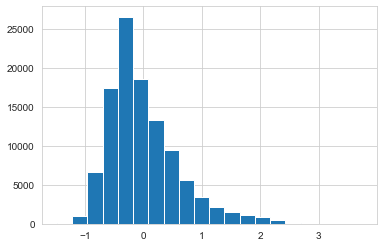

In [385]:
#Checking Error distribution

model_fit.resid.hist(bins=20)
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

In [386]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train_reg['Deciles'] = pd.qcut(train_reg['Predicted_Price'],10,labels=False)
test_reg['Deciles']  = pd.qcut(test_reg['Predicted_Price'],10,labels=False)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [389]:
# Decile Analysis for train data

Predicted_avg = train_reg[['Deciles','Predicted_Price']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Predicted_Price']
Actual_avg = np.exp(train_reg[['Deciles','log_price']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['log_price'])

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train.reset_index()

,Deciles,Predicted_Price,log_price
0,9,250.013443,271.824973
1,8,197.860988,216.628237
2,7,180.146058,182.086367
3,6,169.261634,173.885103
4,5,156.738578,152.986437
5,4,145.395648,142.604050
6,3,131.237351,120.573511
7,2,116.903690,102.058920
8,1,103.644387,91.220350
9,0,79.141556,90.858845


In [390]:
# Decile Analysis for train data

Predicted_avg = test_reg[['Deciles','Predicted_Price']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Predicted_Price']
Actual_avg = np.exp(test_reg[['Deciles','log_price']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['log_price'])

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test.reset_index()

,Deciles,Predicted_Price,log_price
0,9,250.362175,274.885394
1,8,198.381877,217.100953
2,7,180.339304,182.935285
3,6,169.627384,174.850023
4,5,157.225128,152.837529
5,4,145.705014,142.663732
6,3,131.562372,122.780225
7,2,117.249655,102.485409
8,1,103.858205,91.194366
9,0,79.376854,91.036101


#### Model Performance

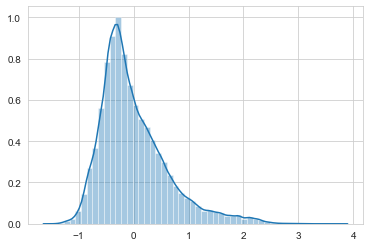

In [391]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(model_fit.resid)
plt.show()

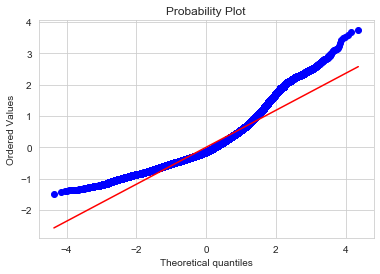

In [392]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(model_fit.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

In [393]:
# assumption: mean of residuals/errors is zero

print(model_fit.resid.mean())

6.153178336177141e-14


In [395]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable

print(stats.stats.pearsonr(model_fit.resid, train_reg.log_price))

(0.8785218460985214, 0.0)


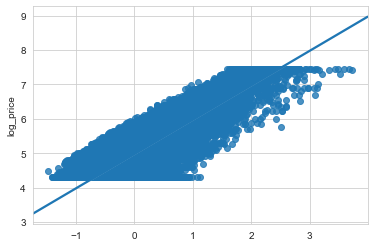

In [396]:
# assumption: homoscedasticity of residuals/errors
#!pip install --upgrade pip
#!pip install seaborn
import seaborn as sns

sns.regplot(x=model_fit.resid, y=train_reg.log_price)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()